To see how I reached this point, take a look at the TwitterStreamer Notebook below.  This highlights the steps to collect all the tweets that were eventually loaded into a Pandas dataframe.

https://github.com/peyjmonahmad/Daily-Twitter-Analysis-Project-/blob/master/TwitterStreamer.ipynb

### Load dataframe of previously collected tweets for the days of Nov 12 to Nov 16.

In [29]:
import pickle
with open("final_df.pkl", 'rb') as picklefile: 
    df = pickle.load(picklefile)

In [30]:
len(df)

18924

### Let's create a function to remove a lot of redundant text, such as links, @ symbols, usernames, and more.

In [35]:
def standardize_text(df, text_field):
    df[text_field] = df[text_field].str.replace(r"http\S+", "")
    df[text_field] = df[text_field].str.replace(r"http", "")
    df[text_field] = df[text_field].str.replace(r"@\S+", "")
    df[text_field] = df[text_field].str.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", " ")
    df[text_field] = df[text_field].str.replace(r"@", "at")
    df[text_field] = df[text_field].str.replace(r'RT',"")
    df[text_field] = df[text_field].str.replace(r'\n',"")
    df[text_field] = df[text_field].str.lower()
    
    return df

In [36]:
df = standardize_text(df,'text')

In [47]:
#Let's see what the dataframe looks like now
df.head(50)

,_id,created_at,favorite_count,retweet_count,screen_name,sentiment,subjectivity,text
0,5beb5c9988ca4501f47f3743,Tue Nov 13 23:21:56 +0000 2018,0,0,evilolive73,0.325000,0.500000,jeremymontanez cnn fakenews enemyofthepe...
1,5beb5c9988ca4501f47f3744,Tue Nov 13 23:21:56 +0000 2018,0,0,ThoseOfUs_Wins,0.233333,0.233333,the left they'e getting paid too much mon...
2,5beb5c9988ca4501f47f3745,Tue Nov 13 23:21:56 +0000 2018,0,0,jenny10434783,0.700000,0.600000,thats so good for you dear
3,5beb5c9988ca4501f47f3746,Tue Nov 13 23:21:56 +0000 2018,0,0,JillNensewitz,0.000000,0.000000,cnn lawsuit over acosta access to wh claimed...
4,5beb5c9888ca4501f47f3736,Tue Nov 13 23:21:55 +0000 2018,0,0,AnneVStrickland,0.166667,0.666667,it s obvious that his bosses at cnn support...
5,5beb5c9888ca4501f47f3737,Tue Nov 13 23:21:55 +0000 2018,0,0,dianne1h,0.000000,0.000000,sarah sanders responds to cnn lawsuit
6,5beb5c9888ca4501f47f3738,Tue Nov 13 23:21:55 +0000 2018,0,0,MDonohue,-0.233333,0.800000,sounds reasonable and therefore impossible
7,5beb5c9888ca4501f47f3739,Tue Nov 13 23:21:55 +0000 2018,0,0,ropebelt,-0.125000,0.606250,"while the ludicrous freedomfries jingoistic, ..."
8,5beb5c9888ca4501f47f373a,Tue Nov 13 23:21:55 +0000 2018,0,0,jaimezle22,0.500000,1.000000,miley cyrus and liam hemsworth lost their ho...
9,5beb5c9888ca4501f47f373b,Tue Nov 13 23:21:55 +0000 2018,0,0,AnthemRespect,0.500000,1.000000,retweet impoantmessages(likes just stay on y...


### We'll create a list of all sentences in the df, as well as words

In [48]:
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize

In [49]:
sentences= list(df['text'])
words = list(df['text'].apply(word_tokenize))

In [53]:
#List of strings
sentences[:10]

['   jeremymontanez  cnn  fakenews  enemyofthepeople  divideandconquer     fakestreammedia you ppl nd to take a good long look in the mirror  amp  c what u promote u all have  soldursoul ur all a bunch of  smiths under lucifers  ',
 "  the left    they'e getting paid too much money to just ignore it    never ever forget   in today's  usa many people wan ",
 ' thats so good for you dear   ',
 '  cnn lawsuit over acosta access to wh claimed daily caller s chuck ross witnessed the acosta confrontation  ross does no ',
 '   it s obvious that his bosses at cnn support what he s doing and most likely encourage it or they would hav ',
 '  sarah sanders responds to cnn lawsuit ',
 '  sounds reasonable and therefore impossible ',
 'while the ludicrous  freedomfries jingoistic, negative nationalistic fad was popular with then bush sycophants, (future trump voter base) fussy dick  cheney demanded perrier or calistoga be sent ahead to hotels he was scheduled to visit when with his wife',
 '  miley

In [52]:
#This should be a list of lists
words[:10]

[['jeremymontanez',
  'cnn',
  'fakenews',
  'enemyofthepeople',
  'divideandconquer',
  'fakestreammedia',
  'you',
  'ppl',
  'nd',
  'to',
  'take',
  'a',
  'good',
  'long',
  'look',
  'in',
  'the',
  'mirror',
  'amp',
  'c',
  'what',
  'u',
  'promote',
  'u',
  'all',
  'have',
  'soldursoul',
  'ur',
  'all',
  'a',
  'bunch',
  'of',
  'smiths',
  'under',
  'lucifers'],
 ['the',
  'left',
  "they'e",
  'getting',
  'paid',
  'too',
  'much',
  'money',
  'to',
  'just',
  'ignore',
  'it',
  'never',
  'ever',
  'forget',
  'in',
  'today',
  "'s",
  'usa',
  'many',
  'people',
  'wan'],
 ['thats', 'so', 'good', 'for', 'you', 'dear'],
 ['cnn',
  'lawsuit',
  'over',
  'acosta',
  'access',
  'to',
  'wh',
  'claimed',
  'daily',
  'caller',
  's',
  'chuck',
  'ross',
  'witnessed',
  'the',
  'acosta',
  'confrontation',
  'ross',
  'does',
  'no'],
 ['it',
  's',
  'obvious',
  'that',
  'his',
  'bosses',
  'at',
  'cnn',
  'support',
  'what',
  'he',
  's',
  'doing

### After initial examination of these tweets, it seems like a very large portion of these tweets are regarding a CNN corespondent Jim Acosta, and other events that are related to him.  Let's get an idea of how much it really is.

In [54]:
acosta_tweets = []
for tweet in sentences:
    if 'acosta' in tweet:
        acosta_tweets.append(tweet)

In [55]:
len(acosta_tweets)

2277

About 12% of the tweets contain the word 'acosta' alone.  A lot of the analysis will revolve around users feeling towards him and CNN.  This is due to the timing of the project, as well as the large follower count for CNN of about 41 million users.

Another thing to note is that tweets towards Fox News was expected to be a major portion of this analysis, but unfortunately, the news source of about 18 million followers decided to go on a twitter protest and thus have not tweeted since Nov 8 :(

### Let's move forward with a count vectorizer, so we can create a sparse matrix of words and tweets

In [56]:
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.preprocessing import Normalizer

In [57]:
#Stop words that we will use
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS

We're going to add some of these domain specific stop words, as we expect these words to show up constantly.

In [119]:
stop_words = ENGLISH_STOP_WORDS | {'trump', 'acosta','cnn','fox','wh','white','house','white house','jim','jim acosta'}

In [120]:
#Create count vectorizer with the stop words list, and bigrams/trigrams
vectorizer = CountVectorizer(min_df = 10, stop_words = stop_words, ngram_range=[1, 3])

In [121]:
#Fit the model with sentences list
dtm = vectorizer.fit_transform(sentences)

In order to find and seperate main topics, we will implement an effective topic modeling module from Gensim called Latent Dirichlet Allocation (LDA).

### LDA with Gensim

https://radimrehurek.com/gensim/models/ldamodel.html

In [64]:
#Gensim material
import gensim
from gensim.test.utils import common_texts
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaModel
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [65]:
# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

#### This creates the dictionary in which we train all our tweets on.

In [104]:
# Create a corpus from a list of texts
common_dictionary = Dictionary(common_texts)
common_corpus = [common_dictionary.doc2bow(text) for text in common_texts]

In [105]:
#Sentence to individual words function
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

In [106]:
words = list(sent_to_words(sentences))

In [74]:
print(words[:2])

[['jeremymontanez', 'cnn', 'fakenews', 'fakestreammedia', 'you', 'ppl', 'nd', 'to', 'take', 'good', 'long', 'look', 'in', 'the', 'mirror', 'amp', 'what', 'promote', 'all', 'have', 'soldursoul', 'ur', 'all', 'bunch', 'of', 'smiths', 'under', 'lucifers'], ['the', 'left', 'they', 'getting', 'paid', 'too', 'much', 'money', 'to', 'just', 'ignore', 'it', 'never', 'ever', 'forget', 'in', 'today', 'usa', 'many', 'people', 'wan']]


This will combine some words into two or three word phrases

In [107]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(words, min_count=5, threshold=100)
trigram = gensim.models.Phrases(bigram[words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[words[0]]])

/Users/peyjmonahmad/anaconda3/lib/python3.6/site-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['jeremymontanez', 'cnn', 'fakenews', 'fakestreammedia', 'you', 'ppl', 'nd', 'to', 'take', 'good', 'long', 'look', 'in', 'the', 'mirror', 'amp', 'what', 'promote', 'all', 'have', 'soldursoul', 'ur', 'all', 'bunch', 'of', 'smiths', 'under', 'lucifers']


### Create functions to implement stop words, bigrams/trigrams and lemmatization

For more info on lemmatization, see below.

https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html

In [78]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [108]:
# Remove Stop Words
words_nostops = remove_stopwords(words)

# Form Bigrams
words_bigrams = make_bigrams(words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['jeremymontanez', 'fakenew', 'fakestreammedia', 'ppl', 'nd', 'good', 'long', 'look', 'mirror', 'amp', 'promote', 'soldursoul', 'bunch', 'smith', 'lucifer']]


In [109]:
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [110]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [111]:
from pprint import pprint
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.048*"president" + 0.045*"reporter" + 0.033*"court" + 0.026*"new" + '
  '0.026*"man" + 0.023*"doesn" + 0.023*"break" + 0.021*"year" + '
  '0.019*"credential" + 0.018*"way"'),
 (1,
  '0.069*"do" + 0.032*"need" + 0.031*"let" + 0.030*"watch" + 0.018*"democrat" '
  '+ 0.016*"vote" + 0.014*"free" + 0.014*"happen" + 0.013*"liberal" + '
  '0.012*"source"'),
 (2,
  '0.084*"say" + 0.039*"know" + 0.030*"don" + 0.026*"good" + 0.022*"come" + '
  '0.021*"lie" + 0.019*"love" + 0.017*"day" + 0.014*"bad" + 0.014*"care"'),
 (3,
  '0.037*"question" + 0.026*"ask" + 0.021*"use" + 0.019*"law" + 0.019*"answer" '
  '+ 0.017*"see" + 0.015*"kill" + 0.015*"country" + 0.015*"dark_secret" + '
  '0.014*"decision"'),
 (4,
  '0.017*"story" + 0.015*"long" + 0.013*"fakenew" + 0.013*"hate" + '
  '0.013*"raise" + 0.012*"company" + 0.011*"outlet" + 0.010*"police" + '
  '0.010*"angel" + 0.010*"change"'),
 (5,
  '0.067*"people" + 0.045*"rule" + 0.025*"lose" + 0.022*"network" + '
  '0.021*"american" + 0.020*"great"

Not bad.  We will compute the perplexity and coherence of the model.  A lower perplexity and higher coherence score means a better model.

In [112]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -9.122810238743364

Coherence Score:  0.39337628287094056


Let's try this again with less topics, and see what happens to our perplexity and coherence scores.

In [114]:
from pprint import pprint
pprint(lda_model1.print_topics())
doc_lda = lda_model1[corpus]

[(0,
  '0.048*"president" + 0.045*"reporter" + 0.033*"court" + 0.026*"new" + '
  '0.026*"man" + 0.023*"doesn" + 0.023*"break" + 0.021*"year" + '
  '0.019*"credential" + 0.018*"way"'),
 (1,
  '0.069*"do" + 0.032*"need" + 0.031*"let" + 0.030*"watch" + 0.018*"democrat" '
  '+ 0.016*"vote" + 0.014*"free" + 0.014*"happen" + 0.013*"liberal" + '
  '0.012*"source"'),
 (2,
  '0.085*"say" + 0.040*"know" + 0.030*"don" + 0.027*"good" + 0.023*"come" + '
  '0.022*"lie" + 0.019*"love" + 0.017*"day" + 0.014*"bad" + 0.014*"care"'),
 (3,
  '0.037*"question" + 0.026*"ask" + 0.021*"use" + 0.019*"law" + 0.019*"answer" '
  '+ 0.017*"see" + 0.015*"kill" + 0.015*"country" + 0.015*"dark_secret" + '
  '0.014*"decision"'),
 (4,
  '0.017*"story" + 0.015*"long" + 0.013*"fakenew" + 0.013*"hate" + '
  '0.013*"raise" + 0.012*"company" + 0.011*"outlet" + 0.010*"police" + '
  '0.010*"angel" + 0.010*"change"'),
 (5,
  '0.067*"people" + 0.045*"rule" + 0.025*"lose" + 0.022*"network" + '
  '0.021*"american" + 0.020*"great"

In [99]:
len(words)

18924

As you can see the coherence score drops as the number of topics drops, so we will stick with 20 topics in the model.

In [115]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
9      16.436542        1       1 -0.407347 -0.005401
2      12.260772        1       2  0.049249 -0.376998
1      10.473414        1       3  0.044047  0.029666
7      10.154552        1       4  0.051030  0.032688
8      10.035730        1       5  0.040037  0.155565
0       9.604985        1       6  0.036813  0.047675
5       8.771963        1       7  0.054844  0.030409
6       7.936248        1       8  0.042308  0.033326
3       7.371888        1       9  0.046181  0.017158
4       6.953907        1      10  0.042838  0.035910, topic_info=     Category         Freq             Term        Total  loglift  logprob
term                                                                      
482   Default  1700.000000            press  1700.000000  30.0000  30.0000
120   Default  1559.000000              say  1559.000000  29.0000  29.0000
108   Default  1441.000000             news  1441.000000  28.0000  28.0000
33    Default  1084.000000               do  1084.000000  27.0000  27.0000
18    Default  1232.000000             just  1232.000000  26.0000  26.0000
172   Default   945.000000             pass   945.000000  25.0000  25.0000
22    Default   886.000000           people   886.000000  24.0000  24.0000
500   Default  1160.000000            judge  1160.000000  23.0000  23.0000
0     Default   959.000000              amp   959.000000  22.0000  22.0000
141   Default   699.000000        president   699.000000  21.0000  21.0000
224   Default   689.000000             time   689.000000  20.0000  20.0000
174   Default   655.000000         reporter   655.000000  19.0000  19.0000
424   Default   728.000000             know   728.000000  18.0000  18.0000
1563  Default   593.000000             rule   593.000000  17.0000  17.0000
116   Default   542.000000              win   542.000000  16.0000  16.0000
238   Default   586.000000            think   586.000000  15.0000  15.0000
128   Default   701.000000            right   701.000000  14.0000  14.0000
89    Default   529.000000               go   529.000000  13.0000  13.0000
221   Default   456.000000             make   456.000000  12.0000  12.0000
207   Default   548.000000              don   548.000000  11.0000  11.0000
254   Default   506.000000             need   506.000000  10.0000  10.0000
764   Default   485.000000            court   485.000000   9.0000   9.0000
712   Default   486.000000              let   486.000000   8.0000   8.0000
121   Default   477.000000            watch   477.000000   7.0000   7.0000
173   Default   409.000000         question   409.000000   6.0000   6.0000
214   Default   461.000000             want   461.000000   5.0000   5.0000
4     Default   489.000000             good   489.000000   4.0000   4.0000
190   Default   432.000000             tell   432.000000   3.0000   3.0000
3979  Default   413.000000      judge_order   413.000000   2.0000   2.0000
155   Default   527.000000           medium   527.000000   1.0000   1.0000
...       ...          ...              ...          ...      ...      ...
695   Topic10   182.277566            story   183.111628   2.6613  -4.0509
6     Topic10   159.492421             long   160.326608   2.6606  -4.1844
2     Topic10   136.191788          fakenew   137.025871   2.6598  -4.3424
922   Topic10   135.441450             hate   136.275586   2.6597  -4.3479
4508  Topic10   131.805743            raise   132.639898   2.6596  -4.3751
1896  Topic10   122.785225          company   123.619418   2.6591  -4.4460
844   Topic10   118.492023           outlet   119.326255   2.6589  -4.4816
1343  Topic10   104.756976           police   105.591052   2.6579  -4.6048
571   Topic10   101.648831           change   102.482934   2.6577  -4.6349
8255  Topic10   104.101470            angel   104.965141   2.6576  -4.6111
686   Topic10    96.337681            group    97.171776   2.6572  -4.6886
1420  Top

We're gonna perform LDA Topic modeling with Sklearn as well, to see if any better results can be formed.  This model requires a much simpler set up.

## LDA with Sklearn

In [117]:
from sklearn.decomposition import LatentDirichletAllocation

lda_model = LatentDirichletAllocation(n_topics=10, n_jobs=-1, max_iter=50)

Fit the model on the past vectorizer 

In [123]:
lda_sk = lda_model.fit(dtm)

In [124]:
lda_sk

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=50, mean_change_tol=0.001,
             n_components=10, n_jobs=-1, n_topics=10, perp_tol=0.1,
             random_state=None, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [125]:
lda_model.components_.argsort()

array([[ 568,    1,  845, ..., 2365, 2589, 2594],
       [  48,    1,  568, ..., 3587, 2048, 1475],
       [1286,    1,  845, ..., 2372, 1878, 1977],
       ...,
       [   1, 1285, 1286, ..., 1878, 2048, 1085],
       [  48, 1286,  845, ..., 2372, 2453, 1015],
       [   1,   48,  568, ..., 1272, 1271, 2372]])

In [127]:
#Gives an id for each word in our vocabulary
index_to_word = {value: key for key, value in vectorizer.vocabulary_.items()}

In [129]:
#This will give us the words for the top 10 topics
for i, topic in enumerate(lda_sk.components_):
    top_word_indices = topic.argsort()[::-1][:10]
    top_words = [index_to_word[word_index] for word_index in top_word_indices]
    print('Topic:', i)
    print(top_words)

Topic: 0
['people', 'pelosi', 'new', 'vote', 'amp', 'democrats', 'll', 'women', 'like', 'president']
Topic: 1
['good', 'like', 'time', 'right', 'media', 'think', 'mueller', 've', 'people', 'yes']
Topic: 2
['lawsuit', 'just', 'news', 'president', 'send', 'thought', 'day', 'journalist', 'conference', 'right']
Topic: 3
['great', 'news', 'democracy', 'says', 'lawsuit', 'going', 'sarah', 'video', 'sanders', 'stand']
Topic: 4
['saudi', 'cia', 'prince', 'ordered', 'crown', 'crown prince', 'saudi crown', 'saudi crown prince', 'death', 'prince ordered']
Topic: 5
['press', 'judge', 'pass', 'press pass', 'reporter', 'free', 'amendment', 'right', 'credentials', 'federal']
Topic: 6
['administration', 'lawsuit', 'love', 'news', 'restore', 'legal', 'attorney', 'hearing', 'court', 'restore press']
Topic: 7
['don', 'like', 'just', 'amp', 'people', 'news', 'know', 'questions', 'does', 'think']
Topic: 8
['did', 'obama', 'news', 'avenatti', 'orders', 'judge orders', 'new', 'wall', 'tucker', 'michael']
Top

This model gives us a little clearer vision of our topics.  There are still a few topics that are closely related.  Topic 2,3,5, and 6 all seem to be about the same subject.  These can all be connected to the situation of Jim Acosta.  At this point, this is just the representation fo the data, so there is not much we can do to change that.

Other topics that stand out include the death ordering done by the Saudi Prince, Michael Avenatti, and Sarah Sanders.  Topic 0 and 1 seem to be around political party preference.

Next steps will be focusing on Word2Vec modeling, and eventually transforming the data into clusters.

### Word2Vec
This model is very useful for detecting content throughout sentences, and ultimately can predict likelihood of the words before and after a certain word.

https://radimrehurek.com/gensim/models/word2vec.html

In [130]:
from gensim.models import Word2Vec

In [134]:
texts = [[word for word in document.lower().split() if word not in stop_words]
         for document in sentences]

In [136]:
w2v_model = Word2Vec(texts, size=100, window=5, min_count=1, workers=4, sg=1)

In [137]:
w2v_model

Now we can test what words are similar to a specific word in our vocabulary

In [140]:
w2v_model.most_similar('avenatti',topn=15)

/Users/peyjmonahmad/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('michael', 0.9780426025390625),
 ('arrested', 0.9762415885925293),
 ('tucker', 0.9746811985969543),
 ('advertised', 0.9738824367523193),
 ('domestic', 0.9719944000244141),
 ('caught', 0.970394492149353),
 ("carlson's", 0.9693905115127563),
 ('reported', 0.9687976241111755),
 ('polls', 0.967466413974762),
 ('reality', 0.9669656753540039),
 ('tweets', 0.9665089249610901),
 ('arrest', 0.9664884805679321),
 ('invasion', 0.9661216735839844),
 ('about!!you', 0.966069221496582),
 ('group', 0.9659738540649414)]

In [141]:
w2v_model.most_similar('saudi',topn=15)

/Users/peyjmonahmad/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('concludes', 0.9939969778060913),
 ('crown', 0.9920171499252319),
 ('murder', 0.9919237494468689),
 ('determined', 0.9918879270553589),
 ('determines', 0.9918276071548462),
 ('prince', 0.9918035864830017),
 ('cia', 0.9916492104530334),
 ('mbs', 0.9893380999565125),
 ('mohammed', 0.9892471432685852),
 ('arabia', 0.9881752729415894),
 ('bin', 0.9877274632453918),
 ('salman', 0.987541675567627),
 ('oh?', 0.9863319396972656),
 ('khashoggi', 0.9862072467803955),
 ('assassinationwash', 0.9845870137214661)]

In [142]:
w2v_model.most_similar('abrams',topn=15)

/Users/peyjmonahmad/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('stacey', 0.9987804889678955),
 ("'democracy", 0.9925109148025513),
 ("failed'", 0.9888261556625366),
 ('ends', 0.9773774147033691),
 ('governor', 0.9773634672164917),
 ('georgia', 0.9707483053207397),
 ('death,', 0.9441314339637756),
 ("khashoggi's", 0.9401422739028931),
 ("journalist's", 0.9365145564079285),
 ('official', 0.9362003803253174),
 ("jamalkhashoggi's", 0.9350751638412476),
 ('mohammedbonesawsalaam', 0.9336996078491211),
 ('mohammedbinsalman', 0.9324951171875),
 ('cnncia', 0.9317567944526672),
 ('shane', 0.9316561222076416)]

In [143]:
w2v_model.most_similar('press',topn=15)

/Users/peyjmonahmad/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('hard', 0.9364634156227112),
 ('access', 0.9257644414901733),
 ('constitutional', 0.9147787690162659),
 ('speech,', 0.9119322299957275),
 ('jones', 0.9104751348495483),
 ('alex', 0.9069480895996094),
 ('violates', 0.9062274098396301),
 ('victory', 0.9054820537567139),
 ("acosta's", 0.9045382738113403),
 ('privilege,', 0.9035201072692871),
 ('ndtv', 0.9025154113769531),
 ('acosta,', 0.9024064540863037),
 ('violation', 0.8998973369598389),
 ('violated', 0.8989914059638977),
 ('rights', 0.898131787776947)]

Looks like the word similarity makes sense.  Now from Word2Vec, we can directly group words into clusters with K-means.

## K-Means clustering on single words

In [147]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=5,init='k-means++')

In [149]:
#The model is fitted on single word vectors
km = km.fit(w2v_model.wv.syn0)

In [150]:
km.cluster_centers_

array([[ 4.11895514e-02, -2.05540955e-02, -5.14657088e-02,
        -4.37888429e-02, -5.45336008e-02,  5.73590118e-03,
         1.95635241e-02, -6.91093691e-03,  1.53624061e-02,
         1.88028328e-02, -2.86486894e-02,  4.49028052e-03,
         1.53607782e-03, -1.42285619e-02,  3.47847641e-02,
        -8.81210342e-03, -4.34263563e-03, -7.14291912e-03,
         4.66624275e-02, -3.97079140e-02, -2.36182734e-02,
        -9.88494791e-03, -2.94009596e-02, -2.02733874e-02,
         1.37389973e-02,  2.96830274e-02,  2.93170735e-02,
         5.49462214e-02, -8.61738529e-03,  1.13315228e-02,
        -2.53829509e-02,  3.69346254e-02, -2.54169293e-02,
        -4.64253239e-02,  2.56339610e-02,  6.13364428e-02,
        -4.07880023e-02, -3.87525372e-02,  2.69702338e-02,
        -3.23143229e-02,  2.29857899e-02, -2.60912701e-02,
         7.35395961e-03,  6.10115612e-03, -3.78815234e-02,
         4.19522263e-02, -7.18168169e-03, -5.05307578e-02,
         3.18131484e-02, -2.01162416e-02, -1.64698139e-0

In [151]:
km.labels_

array([4, 1, 4, ..., 0, 0, 0], dtype=int32)

In [155]:
km.inertia_

1912.0071750362324

Let's check the distribution of the 5 clusters that were generated.

In [153]:
from collections import Counter
sorted(Counter(km.labels_).items())

[(0, 10623), (1, 2370), (2, 3155), (3, 6319), (4, 370)]

Not a bad distribution.  A lot of our data is surrounding one subject, so it makes sence for one cluster to contain a signficant portion of words.

We can get the top words for each cluster to get a better idea about them.

In [158]:
word_vecs = w2v_model.wv.syn0

### Get top words from Clusters
This function below wil generate a dataframe of all the top words for each cluster.

In [163]:
from scipy.spatial import KDTree

In [164]:
def get_top_words(index2word, k, centers, wordvecs):
    
    tree = KDTree(wordvecs)
    
#Closest points for each Cluster center is used to query the closest 20 points to it.
    closest_points = [tree.query(np.reshape(x, (1, -1)), k=k) for x in centers]
    closest_words_idxs = [x[1] for x in closest_points]
    
#Word Index is queried for each position in the above array, and added to a Dictionary.
    closest_words = {}
    for i in range(0, len(closest_words_idxs)):
        closest_words['Cluster #' + str(i)] = [index2word[j] for j in closest_words_idxs[i][0]]
        
#A DataFrame is generated from the dictionary.
    df = pd.DataFrame(closest_words)
    df.index = df.index+1
    
    return df

In [166]:
top_df = get_top_words(w2v_model.wv.index2word, 100, km.cluster_centers_,word_vecs )

In [168]:
top_df.head(30)

,Cluster #0,Cluster #1,Cluster #2,Cluster #3,Cluster #4
1,po,inside,humans,humiliate,jimacosta
2,becuz,career,fbr,eventis,precedent
3,"""bipartisan",positive,kamala,arming,loses
4,creator,straight,fallen,huffpo,grandstanding
5,ticket?(just,crime,forms,prefect,judge's
6,aficionado,lower,environmental,distance,grounds
7,finale,"and,",audience,attn,battle
8,trumpisamoron,beginning,yards,calm,restoring
9,journalismmatters,hitler,airports,"women,",briefing
10,believeher,guest,suggested,todd(meet,release


A lot of interesting words here.  At this point it, it might be the best to cluster full tweets, rather than individual words.

#### This function will get the average vector of all words in each tweet.

In [169]:
def avg_feature_vector(sentence, model, num_features):
    
    index2word_set= set(model.wv.index2word)
    
    words = sentence.split()
    feature_vec = np.zeros((num_features, ), dtype='float32')
    n_words = 0
    for word in words:
        if word in index2word_set:
            n_words += 1
            feature_vec = np.add(feature_vec, model[word])
    if (n_words > 0):
        feature_vec = np.divide(feature_vec, n_words)
    return feature_vec

In [171]:
#Initialize a list to store tweet_vectors
tweet_vecs =[]

#Each sentence will split words and get the full vector
for tweet in sentences:
    vector = avg_feature_vector(tweet, model=w2v_model, num_features=100)
    tweet_vecs.append(vector)

In [172]:
len(tweet_vecs)

18924

In [173]:
tweet_vecs[0]

array([ 0.26288754, -0.03350418, -0.17509429, -0.1493763 , -0.2441215 ,
        0.07367125,  0.12787583, -0.00133126,  0.07185527,  0.07271484,
       -0.07218339, -0.05509315,  0.0109548 , -0.06225236,  0.09067158,
       -0.13948777,  0.04265939, -0.01687318,  0.29424378, -0.20770337,
       -0.12363754, -0.11356118, -0.20147884, -0.06461789,  0.03819539,
        0.17609343,  0.12799671,  0.20861623, -0.048839  ,  0.14847957,
       -0.20289795,  0.21023889, -0.20284644, -0.23587102,  0.14426363,
        0.22825658, -0.21462162, -0.12049138,  0.1769499 , -0.16311492,
        0.1498047 , -0.11325441,  0.06886523,  0.02624707, -0.24684517,
        0.18020454, -0.11647666, -0.18244545,  0.11891085, -0.07273252,
       -0.07600429, -0.23018828, -0.25254208, -0.01124422, -0.32162267,
       -0.01803503, -0.09405262, -0.15395573, -0.06517333, -0.1620611 ,
        0.02153471,  0.02624547,  0.07118758,  0.12209567,  0.08415157,
        0.14266177,  0.09932882,  0.16527446, -0.00218661,  0.01

Now, we have the vectors to cluster full tweets instead of words.

In [175]:
tweet_clusters = km.fit(tweet_vecs)

In [176]:
tweet_clusters.cluster_centers_

array([[ 1.12484485e-01, -4.36397043e-02, -1.20017472e-01,
        -1.00287470e-01, -1.32815323e-01,  2.50225195e-02,
         5.96272902e-02, -1.16579898e-02,  3.50350650e-02,
         4.25215385e-02, -6.12355960e-02, -2.62608619e-03,
         5.04279514e-03, -3.88780520e-02,  7.47549739e-02,
        -3.87819257e-02, -2.23806424e-03, -1.43322199e-02,
         1.32680569e-01, -1.07208396e-01, -6.41993325e-02,
        -3.90453126e-02, -8.75528299e-02, -4.63880447e-02,
         2.58149633e-02,  8.57919869e-02,  7.32474982e-02,
         1.30379628e-01, -2.34865074e-02,  4.42164492e-02,
        -8.29537138e-02,  1.00043560e-01, -7.95857827e-02,
        -1.21106490e-01,  6.73813559e-02,  1.52786714e-01,
        -1.01464682e-01, -9.13711211e-02,  7.67154459e-02,
        -8.76314087e-02,  6.17177496e-02, -6.37935754e-02,
         2.30319044e-02,  1.30083318e-02, -1.08782798e-01,
         1.02471717e-01, -2.64070065e-02, -1.22463563e-01,
         7.32743741e-02, -4.63717946e-02, -4.16904403e-0

In [177]:
sorted(Counter(tweet_clusters.labels_).items())

[(0, 1761), (1, 1812), (2, 290), (3, 5944), (4, 9117)]

In [179]:
tweet_clusters.inertia_

5961.049164984778

Inertia decreased, but thats expected with more volume in each cluster

Let's try a couple more clustering methods to see if the balance of clusters can increase.

Mini Batch K-Means is a very effective clustering method that is not computationally expensive, we can try it with this method.

In [180]:
from sklearn.cluster import MiniBatchKMeans

In [228]:
mbk = MiniBatchKMeans(n_clusters=5)

In [229]:
mbk_clusters = mbk.fit(tweet_vecs)

In [230]:
mbk_labels= mbk_clusters.labels_

In [231]:
sorted(Counter(mbk_clusters.labels_).items())

[(0, 6350), (1, 2847), (2, 288), (3, 8622), (4, 817)]

In [232]:
mbk_clusters.inertia_

6134.906334338031

Even though one cluster is continously getting less love the others, it appears that about 5 clusters is optimal for this data.  We can confirm this with a plot that shows the change in inertia as we increase clusters.

In [204]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km1= km.fit(tweet_vecs)
    Sum_of_squared_distances.append(km1.inertia_)

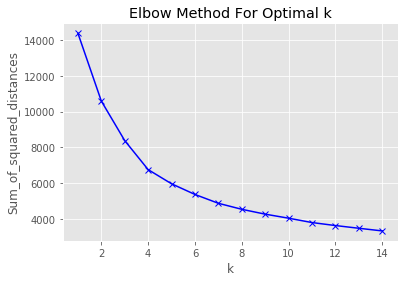

In [205]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

It seems that we are getting diminishing returns at about 5 clusters.  We will stick with this number.

Now, we can examine the different groups.  And do some sentiment analysis on main topics so see the difference in sentiment throughout topics, and the overall sentiment as well.

Let's load the sentences in a dataframe with cluster labels as one of the columns, so the tweets will be differentiated.

In [233]:
tweet_df = pd.DataFrame(sentences)
tweet_df['Cluster Labels'] = mbk_labels

In [210]:
tweet_df.head(10)

,0,Cluster Labels
0,jeremymontanez cnn fakenews enemyofthepe...,4
1,the left they'e getting paid too much mon...,3
2,thats so good for you dear,3
3,cnn lawsuit over acosta access to wh claimed...,3
4,it s obvious that his bosses at cnn support...,4
5,sarah sanders responds to cnn lawsuit,1
6,sounds reasonable and therefore impossible,4
7,"while the ludicrous freedomfries jingoistic, ...",0
8,miley cyrus and liam hemsworth lost their ho...,4
9,retweet impoantmessages(likes just stay on y...,0


In [212]:
#Set max column width to view full sentences
pd.set_option('display.max_colwidth', -1)
tweet_df = tweet_df.rename(columns={0:'Tweet'})

In [213]:
tweet_df.head(25)

,Tweet,Cluster Labels
0,jeremymontanez cnn fakenews enemyofthepeople divideandconquer fakestreammedia you ppl nd to take a good long look in the mirror amp c what u promote u all have soldursoul ur all a bunch of smiths under lucifers,4
1,the left they'e getting paid too much money to just ignore it never ever forget in today's usa many people wan,3
2,thats so good for you dear,3
3,cnn lawsuit over acosta access to wh claimed daily caller s chuck ross witnessed the acosta confrontation ross does no,3
4,it s obvious that his bosses at cnn support what he s doing and most likely encourage it or they would hav,4
5,sarah sanders responds to cnn lawsuit,1
6,sounds reasonable and therefore impossible,4
7,"while the ludicrous freedomfries jingoistic, negative nationalistic fad was popular with then bush sycophants, (future trump voter base) fussy dick cheney demanded perrier or calistoga be sent ahead to hotels he was scheduled to visit when with his wife",0
8,"miley cyrus and liam hemsworth lost their home to a california wildfire, but the famous couple have donated 500,000 as they set t",4
9,"retweet impoantmessages(likes just stay on your page, no one can see them! not even you(learn to retweetmake a differenc",0


In [234]:
tweet_df['Cluster Labels'].value_counts()

3    8622
0    6350
1    2847
4    817 
2    288 
Name: Cluster Labels, dtype: int64

We're going to give each cluster their own dataframe.

In [242]:
df_0 = tweet_df[tweet_df['Cluster Labels'] == 0]
df_1 = tweet_df[tweet_df['Cluster Labels'] == 1]
df_2 = tweet_df[tweet_df['Cluster Labels'] == 2]
df_3 = tweet_df[tweet_df['Cluster Labels'] == 3]
df_4 = tweet_df[tweet_df['Cluster Labels'] == 4] 

In [243]:
df_0.head(50)

,Tweet,Cluster Labels
6,sounds reasonable and therefore impossible,0
7,"while the ludicrous freedomfries jingoistic, negative nationalistic fad was popular with then bush sycophants, (future trump voter base) fussy dick cheney demanded perrier or calistoga be sent ahead to hotels he was scheduled to visit when with his wife",0
9,"retweet impoantmessages(likes just stay on your page, no one can see them! not even you(learn to retweetmake a differenc",0
12,replaced regular nestles cocoa (my family has used nestles forever!) with,0
14,blah blah blah bet the gasoline prices won't drop at the pump,0
18,ok but where do i sign up???,0
22,call in 833 599 nick,0
31,good!!,0
39,"tim, even though your race is not officially being electronically recounted do the machines still",0
42,"actually i would because no one is doing anything sexual, illegal, or immoral in a convention center",0


In [237]:
df_1.head(50)

,0,Cluster Labels
3,cnn lawsuit over acosta access to wh claimed daily caller s chuck ross witnessed the acosta confrontation ross does no,1
11,"if you support and the freedom of speech, please retweet so we can hold accountable for h",1
24,thank you for suing over pass being revoked the president does not have the right to shut down reporters just because he doesn t like the questions he has been violating the 1st amendment for too long freedomofpress,1
36,it shouldn t take a lawsuit from cnn to remind the president of the first amendment the white house should reverse its decision,1
43,""" may have been an irritant to the president but he was hardly a danger to him so i think cnn's got a very good case",1
45,"an actual first amendment lawyer on cnn's lawsuit ""it s not that the president lacks authority to bar individuals who hav",1
60,when it rains it pours on trump bad decisions cnn sues white house to regain access for reporter jim acosta,1
63,jim acosta and cnn sue white house for banning abusive jackass from from constitutional right to harass president via,1
69,cnn gets several things wrong in its lawsuit against the white house via,1
72,a few cnn reporters told me that they re embarrassed by acosta amp cnn a wh correspondent from a major network (not fox),1


Now that each cluster has its own unique dataframe, we will compare sentiments of different groups towards the major talking points.
The sentiments will be conducted through Vader sentiment.  This is a package that specializes in accurately detecting sentiments of social media users

https://github.com/cjhutto/vaderSentiment

For each list, we're going to record the sentiment for every tweet stored inside.  The metric that will be used is the compound score.  This is a score that balances the positivity and negativity of a statement.  The score will be between -1 (most extreme negative) and +1 (most extreme positive).  The threshold for a positive statement is any score greater than 0.05, while a negative statement is a score less than -0.05.  Any score in between these two values is considered a neutral statement.  Finally, we will take the mean score of all the compound scores for a given group. 

In [258]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

### 1. Jim Acosta

In [244]:
acosta0 = []
for tweet in df_0['Tweet']:
    if 'acosta' in tweet:
        acosta0.append(tweet)

In [259]:
acosta_sents0 = []
for sentiment in acosta0:
    vs = analyzer.polarity_scores(sentiment)
    acosta_sents0.append(vs['compound'])

In [264]:
acosta_mean0 = np.mean(acosta_sents0)

In [245]:
acosta1 = []
for tweet in df_1['Tweet']:
    if 'acosta' in tweet:
        acosta1.append(tweet)

In [260]:
acosta_sents1 = []
for sentiment in acosta1:
    vs = analyzer.polarity_scores(sentiment)
    acosta_sents1.append(vs['compound'])

In [265]:
acosta_mean1 = np.mean(acosta_sents1)

In [246]:
acosta2 = []
for tweet in df_2['Tweet']:
    if 'acosta' in tweet:
        acosta2.append(tweet)

In [261]:
acosta_sents2 = []
for sentiment in acosta2:
    vs = analyzer.polarity_scores(sentiment)
    acosta_sents2.append(vs['compound'])

In [267]:
acosta_mean2 = np.mean(acosta_sents2)

/Users/peyjmonahmad/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/peyjmonahmad/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [247]:
acosta3 = []
for tweet in df_3['Tweet']:
    if 'acosta' in tweet:
        acosta3.append(tweet)

In [262]:
acosta_sents3 = []
for sentiment in acosta3:
    vs = analyzer.polarity_scores(sentiment)
    acosta_sents3.append(vs['compound'])

In [268]:
acosta_mean3 = np.mean(acosta_sents3)

In [248]:
acosta4 = []
for tweet in df_4['Tweet']:
    if 'acosta' in tweet:
        acosta4.append(tweet)

In [263]:
acosta_sents4 = []
for sentiment in acosta4:
    vs = analyzer.polarity_scores(sentiment)
    acosta_sents4.append(vs['compound'])

In [269]:
acosta_mean4 = np.mean(acosta_sents4)

Group 2 doesn't have any tweets containing Acosta, so that group will be excluded.

In [275]:
acosta_x = ['Group 0','Group 1','Group 3','Group 4']
acosta_y = [acosta_mean0,acosta_mean1,acosta_mean3,acosta_mean4]

Text(0.5, 1.0, 'Sentiment towards Jim Acosta')

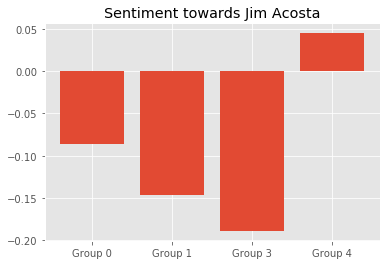

In [276]:
plt.bar(acosta_x,acosta_y)
plt.title('Sentiment towards Jim Acosta')

As you can see, three out of the four clusters have a slightly negative sentiment towards Jim Acosta of less than -0.05.  We expect the overall sentiment to be slightly negative as well, and we can confirm that by taking the mean of all four groups.

In [277]:
total_acosta_sents = acosta_sents0 + acosta_sents1 + acosta_sents3 + acosta_sents4
np.mean(total_acosta_sents)

-0.10776113306982872

Overall, the sentiment towards Jim acosta is considered negative, but it was close to neutral.

The words press and judge were very prevalent throughout the dataset, which will be analyzed next.  It seems that these words were mostly being used in the context of Freedom of Press, and the judge decision regarding CNN coresspondent Jim acosta.

### 2. Press (Freedom of Press)

In [279]:
press0 = []
for tweet in df_0['Tweet']:
    if 'press' in tweet:
        press0.append(tweet)

In [280]:
press_sents0 = []
for sentiment in press0:
    vs = analyzer.polarity_scores(sentiment)
    press_sents0.append(vs['compound'])

In [281]:
press_mean0 = np.mean(press_sents0)

In [282]:
press1 = []
for tweet in df_1['Tweet']:
    if 'press' in tweet:
        press1.append(tweet)

In [283]:
press_sents1 = []
for sentiment in press1:
    vs = analyzer.polarity_scores(sentiment)
    press_sents1.append(vs['compound'])

In [284]:
press_mean1 = np.mean(press_sents1)

In [285]:
press2 = []
for tweet in df_2['Tweet']:
    if 'press' in tweet:
        press2.append(tweet)

In [286]:
press_sents2 = []
for sentiment in press2:
    vs = analyzer.polarity_scores(sentiment)
    press_sents2.append(vs['compound'])

In [287]:
press_mean2 = np.mean(press_sents2)

In [288]:
press3 = []
for tweet in df_3['Tweet']:
    if 'press' in tweet:
        press3.append(tweet)

In [289]:
press_sents3 = []
for sentiment in press3:
    vs = analyzer.polarity_scores(sentiment)
    press_sents3.append(vs['compound'])

In [290]:
press_mean3 = np.mean(press_sents3)

In [291]:
press4 = []
for tweet in df_4['Tweet']:
    if 'press' in tweet:
        press4.append(tweet)

In [292]:
press_sents4 = []
for sentiment in press4:
    vs = analyzer.polarity_scores(sentiment)
    press_sents4.append(vs['compound'])

In [293]:
press_mean4 = np.mean(press_sents4)

In [299]:
press_x = ['Group 0','Group 1','Group 3','Group 4']
press_y = [press_mean0,press_mean1,press_mean3,press_mean4]

Text(0.5, 1.0, 'Sentiment towards Freedom of Press')

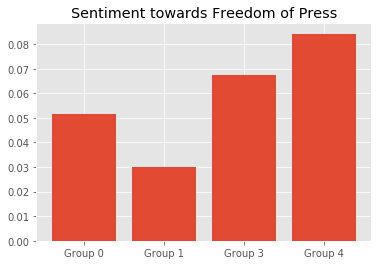

In [300]:
plt.bar(press_x,press_y)
plt.title('Sentiment towards Freedom of Press')

Throughout the groups, it is apparent that different groups generally feel positive about freedom of press.  This seems that regardless of how people feel about the situation, they will support someone's right for a freedom of press.

### 3. Judge

In [301]:
judge0 = []
for tweet in df_0['Tweet']:
    if 'judge' in tweet:
        judge0.append(tweet)

In [302]:
judge_sents0 = []
for sentiment in judge0:
    vs = analyzer.polarity_scores(sentiment)
    judge_sents0.append(vs['compound'])

In [303]:
judge_mean0 = np.mean(judge_sents0)

In [304]:
judge1 = []
for tweet in df_1['Tweet']:
    if 'judge' in tweet:
        judge1.append(tweet)

In [305]:
judge_sents1 = []
for sentiment in judge1:
    vs = analyzer.polarity_scores(sentiment)
    judge_sents1.append(vs['compound'])

In [306]:
judge_mean1 = np.mean(judge_sents1)

In [310]:
judge3 = []
for tweet in df_3['Tweet']:
    if 'judge' in tweet:
        judge3.append(tweet)

In [311]:
judge_sents3 = []
for sentiment in judge3:
    vs = analyzer.polarity_scores(sentiment)
    judge_sents3.append(vs['compound'])

In [312]:
judge_mean3 = np.mean(judge_sents3)

In [316]:
judge_x = ['Group 0','Group 1','Group 3']
judge_y = [judge_mean0,judge_mean1,judge_mean3]

Text(0.5, 1.0, 'Sentiment towards Judge')

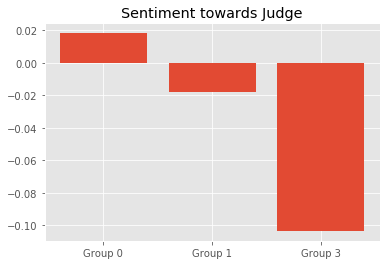

In [317]:
plt.bar(judge_x,judge_y)
plt.title('Sentiment towards Judge')

The picture is less clear for the sentiment towards the judge decision.  Two out of the three groups had a neutral sentiment, while the other was slightly negative.  Let's calculate the overall sentiment.

In [318]:
total_judge = judge_sents0 + judge_sents1 + judge_sents3

In [319]:
np.mean(total_judge)

-0.030337204724409452

Overall, since the sentiment is between -0.05 and 0.05, we deem the sentiment towards the judge decision as neutral.

There are a few more topics that are not as prevalant, but still significant, such as Michael Avenatti, Stacey Abrams, and the Saudi Prince.  It'll be interesting to see the sentiment about these topics.

### 4. Michael Avenatti

In [324]:
avenatti_0 = []
for tweet in df_0['Tweet']:
    if 'avenatti' in tweet:
        avenatti_0.append(tweet)

In [325]:
avenatti_sents0 = []
for sentiment in avenatti_0:
    vs = analyzer.polarity_scores(sentiment)
    avenatti_sents0.append(vs['compound'])

In [327]:
avenatti_mean0 = np.mean(avenatti_sents0)

In [328]:
avenatti_1 = []
for tweet in df_1['Tweet']:
    if 'avenatti' in tweet:
        avenatti_1.append(tweet)

In [ ]:
avenatti_sents1 = []
for sentiment in avenatti_1:
    vs = analyzer.polarity_scores(sentiment)
    avenatti_sents1.append(vs['compound'])

In [330]:
avenatti_mean1 = np.mean(avenatti_sents1)

In [331]:
avenatti_3 = []
for tweet in df_3['Tweet']:
    if 'avenatti' in tweet:
        avenatti_3.append(tweet)

In [332]:
avenatti_sents3 = []
for sentiment in avenatti_3:
    vs = analyzer.polarity_scores(sentiment)
    avenatti_sents3.append(vs['compound'])

In [333]:
avenatti_mean3 = np.mean(avenatti_sents3)

In [338]:
ave_x = ['Group 0','Group 1','Group 3']
ave_y = [avenatti_mean0,avenatti_mean1,avenatti_mean3]

Text(0.5, 1.0, 'Sentiment towards Michael Avenatti')

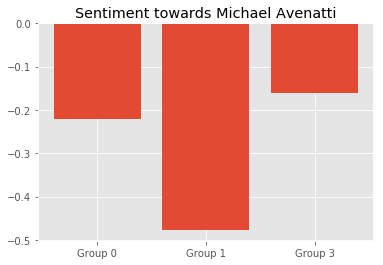

In [339]:
plt.bar(ave_x,ave_y)
plt.title('Sentiment towards Michael Avenatti')

In [341]:
total_avenatti = avenatti_mean0 + avenatti_mean1 + avenatti_mean3
np.mean(total_avenatti)

-0.8587319105691058

It is no surprise that the sentiment towards Michael Avenatti is extremely negative, as he was recently arrested for domestic abuse charges against his ex-wife.  Twitter users are not happy about his recent actions.

### 5.Stacey Abrams

In [342]:
abrams_0 = []
for tweet in df_0['Tweet']:
    if 'abrams' in tweet:
        abrams_0.append(tweet)

In [343]:
abrams_sents0 = []
for sentiment in abrams_0:
    vs = analyzer.polarity_scores(sentiment)
    abrams_sents0.append(vs['compound'])

In [344]:
abrams_mean0 = np.mean(abrams_sents0)

In [345]:
abrams_1 = []
for tweet in df_1['Tweet']:
    if 'abrams' in tweet:
        abrams_1.append(tweet)

In [346]:
abrams_sents1 = []
for sentiment in abrams_1:
    vs = analyzer.polarity_scores(sentiment)
    abrams_sents1.append(vs['compound'])

In [347]:
abrams_mean1 = np.mean(abrams_sents1)

In [348]:
abrams_3 = []
for tweet in df_3['Tweet']:
    if 'abrams' in tweet:
        abrams_3.append(tweet)

In [349]:
abrams_sents3 = []
for sentiment in abrams_3:
    vs = analyzer.polarity_scores(sentiment)
    abrams_sents3.append(vs['compound'])

In [350]:
abrams_mean3 = np.mean(abrams_sents3)

In [354]:
abrams_x = ['Group 0','Group 1','Group 3']
abrams_y = [abrams_mean0,abrams_mean1,abrams_mean3]

Text(0.5, 1.0, 'Sentiment towards Stacey Abrams')

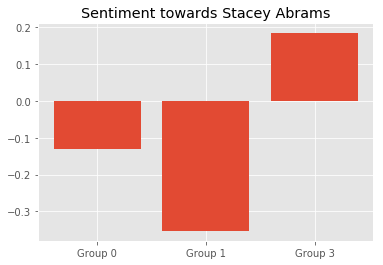

In [355]:
plt.bar(abrams_x,abrams_y)
plt.title('Sentiment towards Stacey Abrams')

In [357]:
total_abrams = abrams_sents0 + abrams_sents1 + abrams_sents3
np.mean(total_abrams)

-0.045552

Overall, the sentiment towards is bordering on negative.  The story for her consists of being defeated in the Georgia governor's race, yet she announced that she not conceding nor accepting defeat.  it makes sense that most users feel slightly negative about her speech.

Ultimately, it would been nice to extract some more meaningful information from these models, but their were several limitations that hindered the performance of the modeling.  Many of the tweets were pertaining to the subject of Jim Acosta, rather than getting insight about many different subjects.

Although the results are hardly satisfying, this workflow can be used across many different domains to take away some meaningful insights.

Just to clarify the steps of the process, I used Tweepy to stream about 20,000 tweets containing the key words CNN, Fox News, Economist, and Wall street Journal.  Then, I cleaned and standardized the tweets in order to utilize them as effectively as possible.  Next, I dove into some topic modeling with LDA, and some context toping modeling with Word2Vec.  This allowed me to learn about the main topics and trends that users were consistently talking about.  Once I learned this information, I used a couple clustering methods to separate the tweets into unique clusters.  Finally, I did some sentiment analysis on these main topics, and compared these sentiments across different clusters, to see how positive or negative users feelings are towards these popular talking points.

This analysis can be expanded by looking into the reasoning behind the difference in sentiments among unique groups.